***决策树***

In [1]:
import pandas as pd

titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

print titanic.head()

print titanic.info()

   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  

In [2]:
#提取需要的特征
X = titanic[['pclass','age','sex']]
y = titanic['survived']

print X.info()

#进行数据处理
#1.age特征中只有633条数据,要对缺失的部分进行处理
#2.pclass,sex两个数据的值都是类别型,将其转换为数值特征,用0/1代替

X['age'].fillna(X['age'].mean(),inplace = True)

print X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       633 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 30.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       1313 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 30.8+ KB
None


/home/leeqh/anaconda3/envs/Py2/lib/python2.7/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [3]:
#数据分割
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 33)

from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse = False)

X_train = vec.fit_transform(X_train.to_dict(orient = 'record'))
#rint vec.feature_names_
X_test = vec.transform(X_test.to_dict(orient = 'record'))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_predict = dtc.predict(X_test)

/home/leeqh/anaconda3/envs/Py2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
vec.feature_names_

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

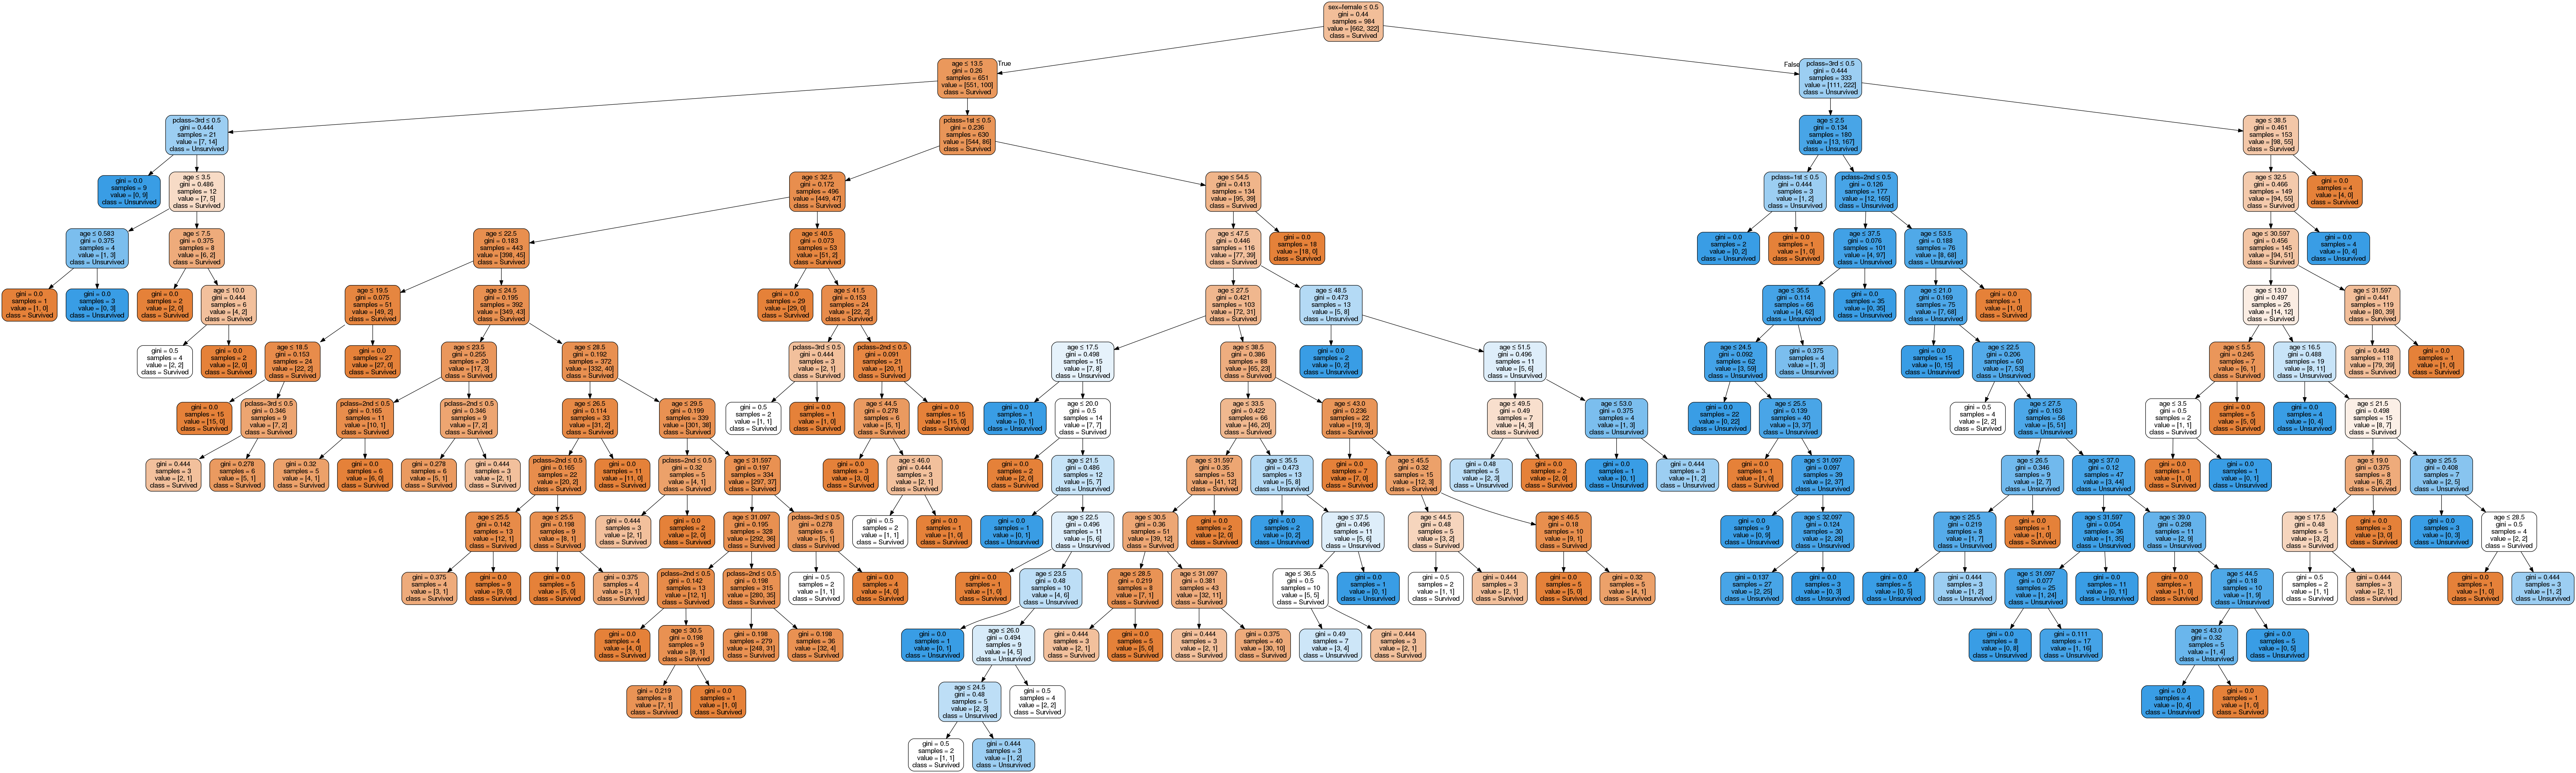

In [11]:
import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtc, out_file=None, 
                         feature_names=vec.feature_names_,  
                         class_names=['Survived','Unsurvived'], 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [17]:
#性能评估
from sklearn.metrics import classification_report

print dtc.score(X_test,y_test)

print classification_report(y_predict,y_test,target_names = ['died','survived'])

0.7811550151975684
             precision    recall  f1-score   support

       died       0.91      0.78      0.84       236
   survived       0.58      0.80      0.67        93

avg / total       0.81      0.78      0.79       329

